## TODO compare offset-subtraction to low-pass filtering

In [1]:
def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'lines'
#     p.cfg['data_source'] = 'experimental'
    p.cfg['set_phi'] = True
    p.cfg['nepochs'] = 60

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 10
    p.cfg['output_prefix'] = 'lines3'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 1
    
init()
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

2023-06-01 02:21:46.473257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 02:21:46.558020: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-01 02:21:46.892579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-06-01 02:21:46.892625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

In [2]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p
from ptycho import generate_data as gen
# from ptycho import train

No cached result found. Calculating and caching the result.
simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
No cached result found. Calculating and caching the result.
simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
1.0000008
nphoton 8.962649


In [ ]:
reload(gen)

In [3]:
# lines = init.YY_ground_truth

In [15]:
grf = np.absolute(gen.YY_ground_truth)

In [22]:
experimental = np.absolute(gen.YY_ground_truth)

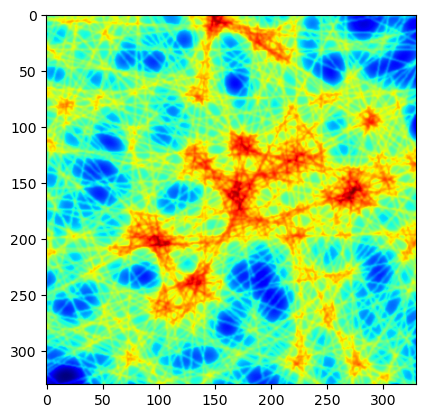

In [11]:
import numpy as np
plt.imshow(np.absolute(lines), cmap = 'jet')

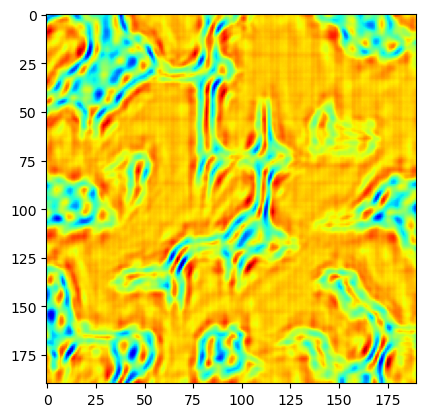

In [23]:
plt.imshow(np.absolute(lines), cmap = 'jet')
plt.imshow(np.absolute(grf), cmap = 'jet')
plt.imshow(np.absolute(experimental), cmap = 'jet')

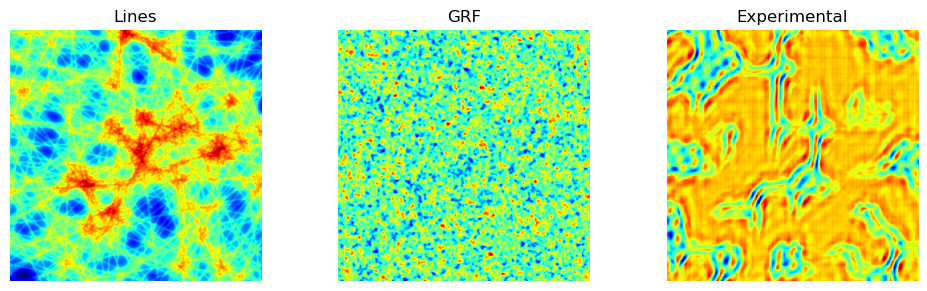

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# First heatmap
axs[0].imshow(np.absolute(lines), cmap='jet')
axs[0].set_title('Lines')
axs[0].axis('off')

# Second heatmap
axs[1].imshow(np.absolute(grf), cmap='jet')
axs[1].set_title('GRF')
axs[1].axis('off')

# Third heatmap
axs[2].imshow(np.absolute(experimental), cmap='jet')
axs[2].set_title('Experimental')
axs[2].axis('off')

plt.tight_layout()
plt.show()


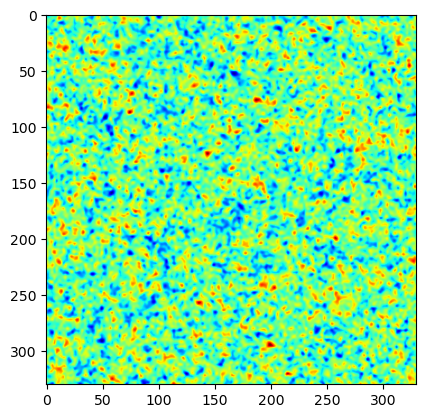

In [16]:
import numpy as np
plt.imshow(np.absolute(grf), cmap = 'jet')

In [3]:
p.cfg['outer_offset_train']

8

In [4]:
p.cfg['outer_offset_test']

20

In [5]:
init.X_train.shape

(13448, 64, 64, 4)

In [3]:
from ptycho import tf_helper as hh

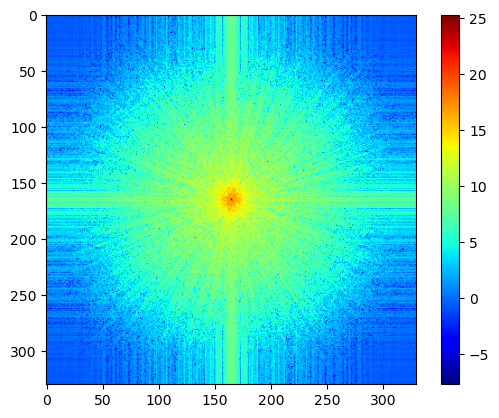

In [7]:
from ptycho import evaluation as eval
import numpy as np
reload(eval)

F2 = np.absolute(eval.fft2d(np.absolute(init.YY_ground_truth[:, :, 0])))**2

plt.imshow(np.log(F2[:, :]), cmap = 'jet')
plt.colorbar()

In [8]:
size = (np.array(init.YY_ground_truth[:, :, 0]).size)

## Full PINN model, best params:

In [3]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'lines2'

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
using nominal scan positions for training


2023-06-01 02:25:09.860730: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-06-01 02:25:09.860747: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-06-01 02:25:09.860770: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-06-01 02:25:09.861032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-06-01 02:25:09.911495: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-06-01 02:25:09.911874: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-06-01 02:25:15.819176: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-06-01 02:25:16.916177: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x6a188b0


799/799 [==============================] - 14s 14ms/step - loss: 112950904.0000 - trimmed_obj_loss: 0.1432 - intensity_scaler_inv_loss: 17.1091 - distribution_lambda_loss: 112950904.0000 - probe_illumination_loss: 0.0311 - val_loss: 60660200.0000 - val_trimmed_obj_loss: 0.1464 - val_intensity_scaler_inv_loss: 15.5287 - val_distribution_lambda_loss: 60660200.0000 - val_probe_illumination_loss: 0.0311 - lr: 0.0010
Epoch 2/60
799/799 [==============================] - 10s 13ms/step - loss: 43154008.0000 - trimmed_obj_loss: 0.1364 - intensity_scaler_inv_loss: 14.0631 - distribution_lambda_loss: 43154008.0000 - probe_illumination_loss: 0.0311 - val_loss: 50117472.0000 - val_trimmed_obj_loss: 0.1359 - val_intensity_scaler_inv_loss: 14.8703 - val_distribution_lambda_loss: 50117472.0000 - val_probe_illumination_loss: 0.0311 - lr: 0.0010
Epoch 3/60
799/799 [==============================] - 10s 13ms/step - loss: 32259650.0000 - trimmed_obj_loss: 0.1201 - intensity_scaler_inv_loss: 13.0304 - dis

Epoch 20/60
799/799 [==============================] - 10s 13ms/step - loss: 4616614.5000 - trimmed_obj_loss: 0.1403 - intensity_scaler_inv_loss: 6.3809 - distribution_lambda_loss: 4616614.5000 - probe_illumination_loss: 0.0311 - val_loss: 5126469.5000 - val_trimmed_obj_loss: 0.1400 - val_intensity_scaler_inv_loss: 6.5646 - val_distribution_lambda_loss: 5126469.5000 - val_probe_illumination_loss: 0.0311 - lr: 5.0000e-04
Epoch 21/60
798/799 [============================>.] - ETA: 0s - loss: 4360104.0000 - trimmed_obj_loss: 0.1411 - intensity_scaler_inv_loss: 6.2200 - distribution_lambda_loss: 4360104.0000 - probe_illumination_loss: 0.0311
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
799/799 [==============================] - 10s 13ms/step - loss: 4360974.0000 - trimmed_obj_loss: 0.1411 - intensity_scaler_inv_loss: 6.2204 - distribution_lambda_loss: 4360974.0000 - probe_illumination_loss: 0.0311 - val_loss: 5359884.0000 - val_trimmed_obj_loss: 0.1405 - val

799/799 [==============================] - 10s 13ms/step - loss: 2713301.2500 - trimmed_obj_loss: 0.1429 - intensity_scaler_inv_loss: 5.1821 - distribution_lambda_loss: 2713301.2500 - probe_illumination_loss: 0.0311 - val_loss: 3255330.2500 - val_trimmed_obj_loss: 0.1426 - val_intensity_scaler_inv_loss: 5.5500 - val_distribution_lambda_loss: 3255330.2500 - val_probe_illumination_loss: 0.0311 - lr: 1.0000e-04
Epoch 38/60
799/799 [==============================] - 10s 13ms/step - loss: 2692082.0000 - trimmed_obj_loss: 0.1428 - intensity_scaler_inv_loss: 5.1642 - distribution_lambda_loss: 2692082.0000 - probe_illumination_loss: 0.0311 - val_loss: 3213380.7500 - val_trimmed_obj_loss: 0.1424 - val_intensity_scaler_inv_loss: 5.5117 - val_distribution_lambda_loss: 3213380.7500 - val_probe_illumination_loss: 0.0311 - lr: 1.0000e-04
Epoch 39/60
799/799 [==============================] - 10s 13ms/step - loss: 2662120.5000 - trimmed_obj_loss: 0.1428 - intensity_scaler_inv_loss: 5.1412 - distribut

799/799 [==============================] - 10s 13ms/step - loss: 2351831.2500 - trimmed_obj_loss: 0.1420 - intensity_scaler_inv_loss: 4.8809 - distribution_lambda_loss: 2351831.2500 - probe_illumination_loss: 0.0311 - val_loss: 2941881.0000 - val_trimmed_obj_loss: 0.1418 - val_intensity_scaler_inv_loss: 5.3126 - val_distribution_lambda_loss: 2941881.0000 - val_probe_illumination_loss: 0.0311 - lr: 1.0000e-04
Epoch 57/60
799/799 [==============================] - 10s 13ms/step - loss: 2347501.5000 - trimmed_obj_loss: 0.1419 - intensity_scaler_inv_loss: 4.8758 - distribution_lambda_loss: 2347501.5000 - probe_illumination_loss: 0.0311 - val_loss: 2987368.5000 - val_trimmed_obj_loss: 0.1421 - val_intensity_scaler_inv_loss: 5.3387 - val_distribution_lambda_loss: 2987368.5000 - val_probe_illumination_loss: 0.0311 - lr: 1.0000e-04
Epoch 58/60
799/799 [==============================] - 10s 13ms/step - loss: 2317291.5000 - trimmed_obj_loss: 0.1419 - intensity_scaler_inv_loss: 4.8523 - distribut

phase min: -0.854308 phase max: 0.6773985


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:79: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985
phase min: -0.854308 phase max: 0.6773985


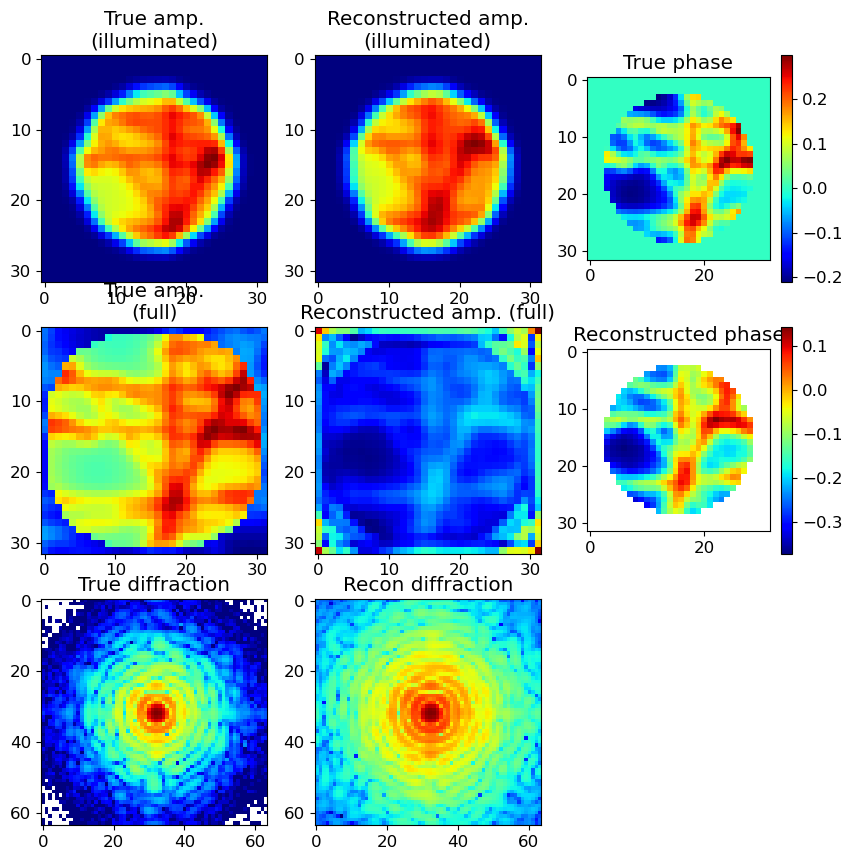

In [7]:
idxs = list(range(0, 100, 10))

from ptycho import evaluation
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj, X_test, Y_I_test, Y_phi_test, probe.probe, 0) for i in idxs]

In [4]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean -0.019812739
subtracting mean 0.15539616
mean scale adjustment: 5.6435604
mean scale adjustment: 5.6435604
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1
performed by index method
performed by index method
performed by index method


{'mae': (0.03353608, 0.020425873),
 'mse': (0.001852146, 0.00067749957),
 'psnr': (75.45405109725989, 79.82171309873053),
 'frc50': (166, 166)}

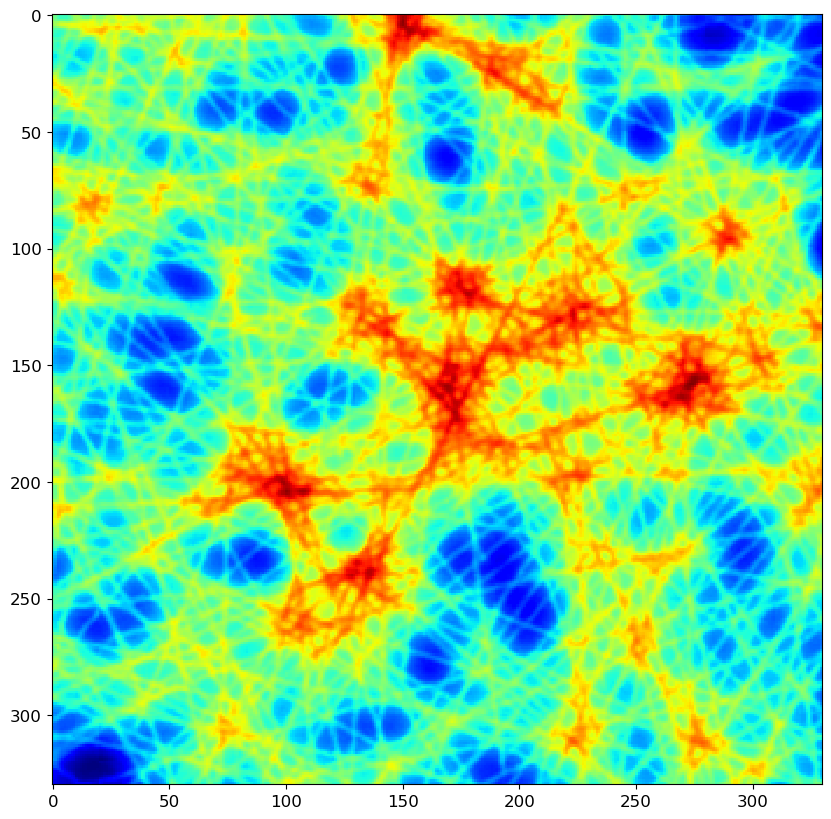

In [11]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(np.absolute(stitched_obj)[0], cmap = 'jet', interpolation='none')

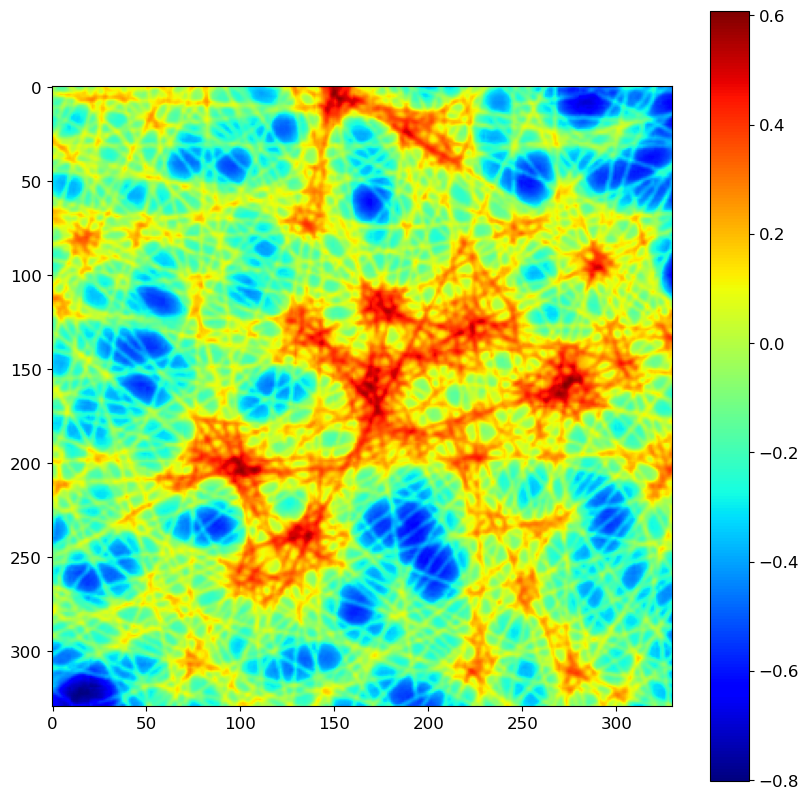

In [13]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(np.angle(stitched_obj)[0], cmap = 'jet')
plt.colorbar()

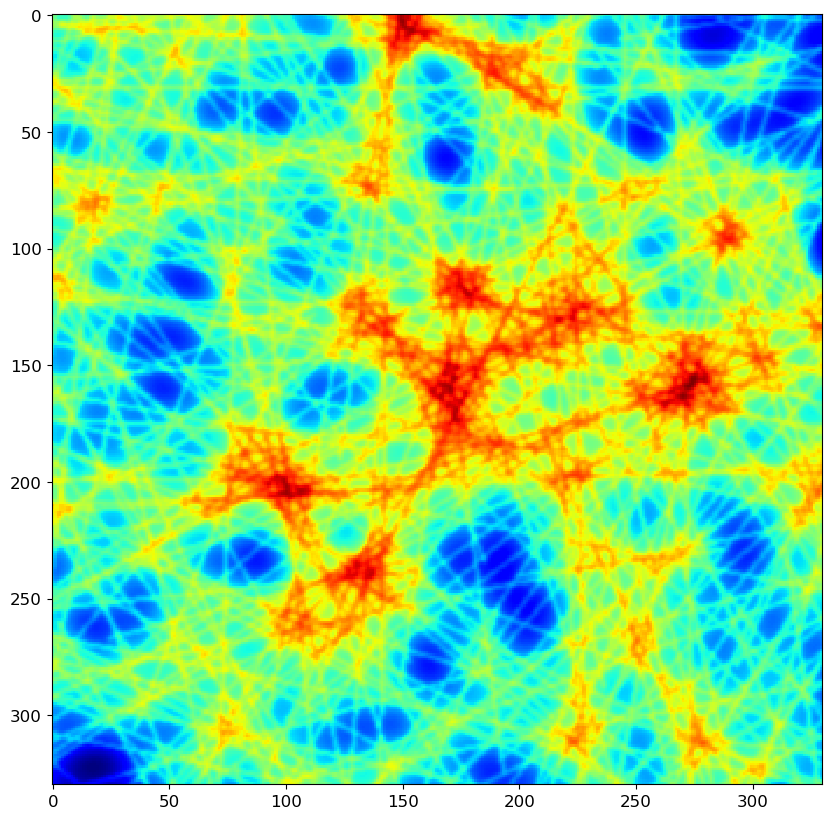

In [18]:
plt.imshow(np.absolute(init.YY_ground_truth), interpolation = 'none',
          cmap = 'jet')


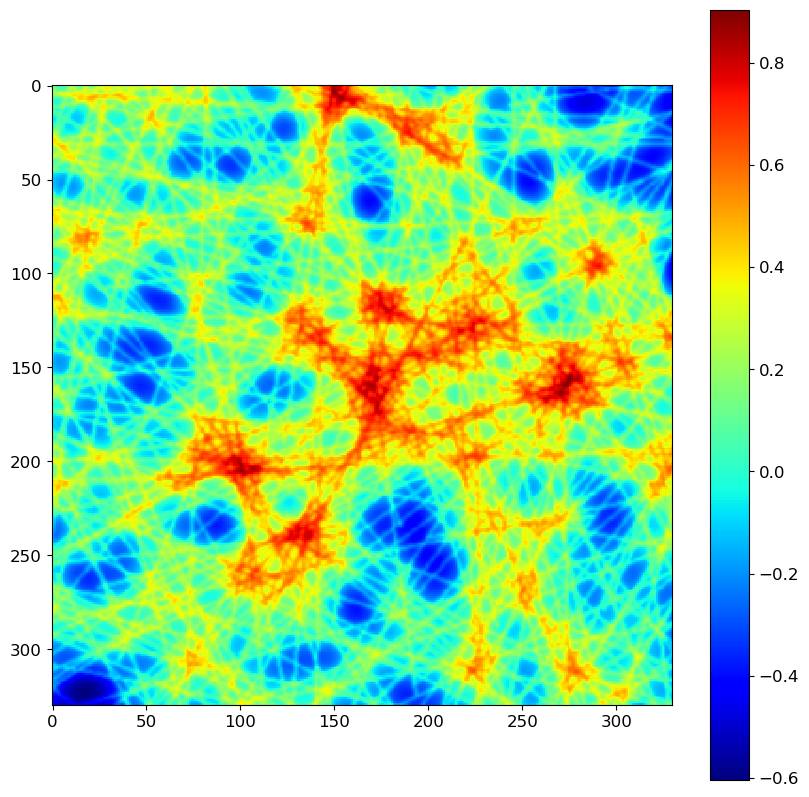

In [17]:
# vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
# vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
plt.imshow(np.angle(init.YY_ground_truth), interpolation = 'none',
          cmap = 'jet')
plt.colorbar()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


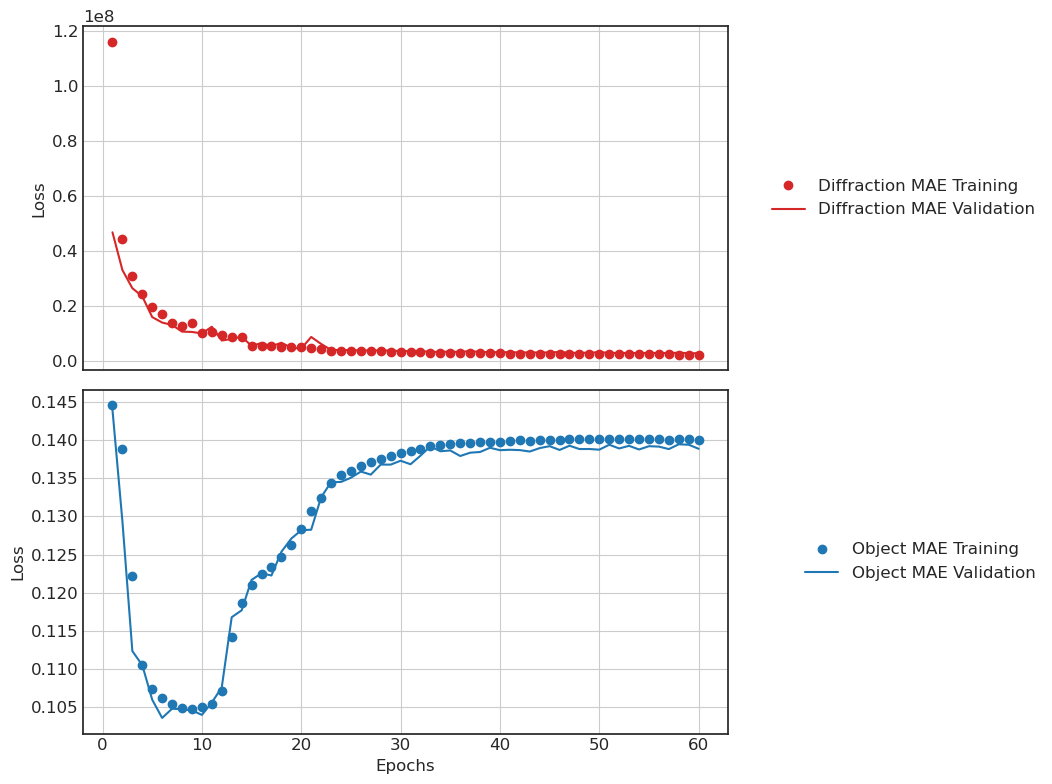

In [18]:
from ptycho import evaluation
reload(evaluation)

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

## PINN, NLL, no overlap:

In [8]:
from ptycho import train_pinn

In [56]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

# reload(gen)
reload(train.model)
reload(train_pinn)

print(p.cfg)
from ptycho.generate_data import *
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 4,396,227
Trainable params: 4,392,131
Non-trainable params: 4,096
__________________________________________________________________________________________________
None


2023-06-01 14:22:23.599161: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-06-01 14:22:23.599178: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-06-01 14:22:23.855235: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-06-01 14:22:23.855338: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
819/819 [==============================] - 11s 12ms/step - loss: 22477844.0000 - trimmed_obj_loss: 0.2000 - intensity_scaler_inv_loss: 15.8697 - distribution_lambda_loss: 22477844.0000 - probe_illumination_loss: 0.0308 - val_loss: 10476065.0000 - val_trimmed_obj_loss: 0.2032 - val_intensity_scaler_inv_loss: 14.0295 - val_distribution_lambda_loss: 10476065.0000 - val_probe_illumination_loss: 0.0308 - lr: 0.0010
Epoch 2/60
819/819 [==============================] - 10s 12ms/step - loss: 8611077.0000 - trimmed_obj_loss: 0.2009 - intensity_scaler_inv_loss: 13.1972 - distribution_lambda_loss: 8611077.0000 - probe_illumination_loss: 0.0308 - val_loss: 8572644.0000 - val_trimmed_obj_loss: 0.1979 - val_intensity_scaler_inv_loss: 12.9463 - val_distribution_lambda_loss: 8572644.0000 - val_probe_illumination_loss: 0.0308 - lr: 0.0010
Epoch 3/60
819/819 [==============================] - 10s 12ms/step - loss: 7314663.5000 - trimmed_obj_loss: 0.1983 - intensity_scaler_inv_loss: 12.5558 -

Epoch 20/60
819/819 [==============================] - 9s 12ms/step - loss: 1435893.0000 - trimmed_obj_loss: 0.2046 - intensity_scaler_inv_loss: 6.9375 - distribution_lambda_loss: 1435893.0000 - probe_illumination_loss: 0.0308 - val_loss: 1508882.7500 - val_trimmed_obj_loss: 0.2068 - val_intensity_scaler_inv_loss: 7.1212 - val_distribution_lambda_loss: 1508882.7500 - val_probe_illumination_loss: 0.0308 - lr: 5.0000e-04
Epoch 21/60
819/819 [==============================] - 9s 12ms/step - loss: 1419067.7500 - trimmed_obj_loss: 0.2058 - intensity_scaler_inv_loss: 6.8784 - distribution_lambda_loss: 1419067.7500 - probe_illumination_loss: 0.0308 - val_loss: 1671756.3750 - val_trimmed_obj_loss: 0.2077 - val_intensity_scaler_inv_loss: 7.2237 - val_distribution_lambda_loss: 1671756.3750 - val_probe_illumination_loss: 0.0308 - lr: 5.0000e-04
Epoch 22/60
819/819 [==============================] - 9s 12ms/step - loss: 1279506.2500 - trimmed_obj_loss: 0.2083 - intensity_scaler_inv_loss: 6.6951 - 

Epoch 39/60
816/819 [============================>.] - ETA: 0s - loss: 835425.6250 - trimmed_obj_loss: 0.1818 - intensity_scaler_inv_loss: 5.6520 - distribution_lambda_loss: 835425.6250 - probe_illumination_loss: 0.0307
Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
819/819 [==============================] - 10s 12ms/step - loss: 835488.3125 - trimmed_obj_loss: 0.1818 - intensity_scaler_inv_loss: 5.6517 - distribution_lambda_loss: 835488.3125 - probe_illumination_loss: 0.0308 - val_loss: 972116.1875 - val_trimmed_obj_loss: 0.1820 - val_intensity_scaler_inv_loss: 5.9946 - val_distribution_lambda_loss: 972116.1875 - val_probe_illumination_loss: 0.0308 - lr: 2.5000e-04
Epoch 40/60
819/819 [==============================] - 10s 12ms/step - loss: 773965.2500 - trimmed_obj_loss: 0.1803 - intensity_scaler_inv_loss: 5.4878 - distribution_lambda_loss: 773965.2500 - probe_illumination_loss: 0.0308 - val_loss: 908472.5000 - val_trimmed_obj_loss: 0.1818 - val_intensit

819/819 [==============================] - 9s 12ms/step - loss: 692015.7500 - trimmed_obj_loss: 0.1809 - intensity_scaler_inv_loss: 5.2352 - distribution_lambda_loss: 692015.7500 - probe_illumination_loss: 0.0308 - val_loss: 809541.9375 - val_trimmed_obj_loss: 0.1818 - val_intensity_scaler_inv_loss: 5.5385 - val_distribution_lambda_loss: 809541.9375 - val_probe_illumination_loss: 0.0308 - lr: 1.0000e-04
Epoch 58/60
819/819 [==============================] - 9s 12ms/step - loss: 687182.8125 - trimmed_obj_loss: 0.1813 - intensity_scaler_inv_loss: 5.2202 - distribution_lambda_loss: 687182.8125 - probe_illumination_loss: 0.0308 - val_loss: 810475.5625 - val_trimmed_obj_loss: 0.1799 - val_intensity_scaler_inv_loss: 5.5513 - val_distribution_lambda_loss: 810475.5625 - val_probe_illumination_loss: 0.0308 - lr: 1.0000e-04
Epoch 59/60
819/819 [==============================] - 10s 12ms/step - loss: 682438.4375 - trimmed_obj_loss: 0.1812 - intensity_scaler_inv_loss: 5.2051 - distribution_lambda_

In [48]:
img_dict_ptychopinn = ptychopinn_heatmaps[0]

img_dict_pinn.keys()

<module 'ptycho.evaluation' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py'>

phase min: -0.70886123 phase max: 2.7932673


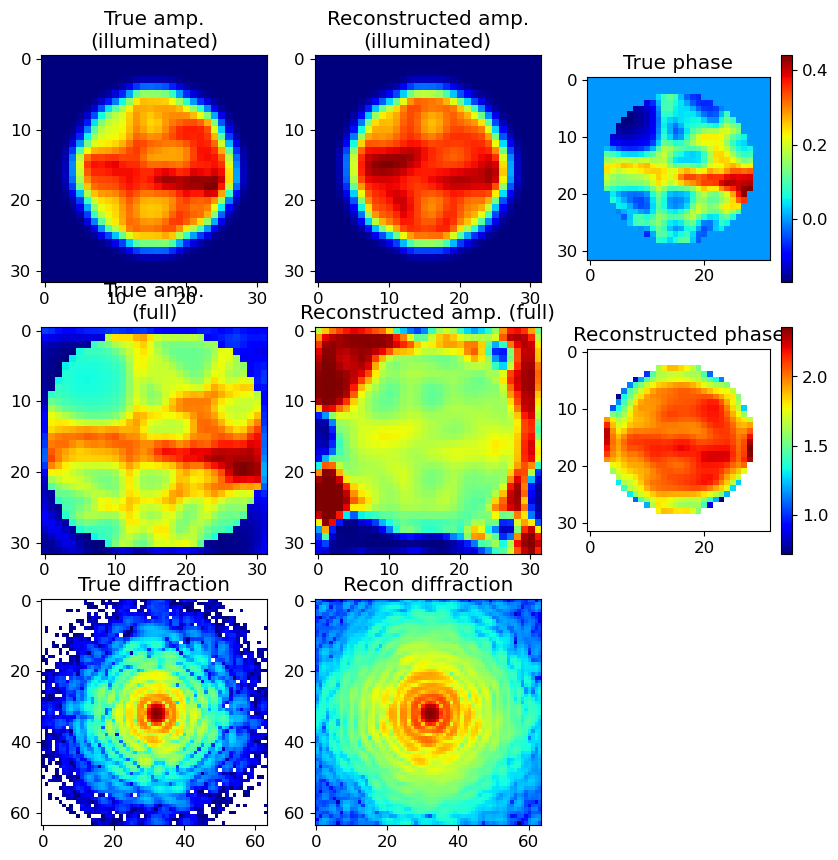

In [14]:
evaluation.summarize(0, train_pinn.pred_amp, train_pinn.reconstructed_obj, X_test, Y_I_test, Y_phi_test, probe.probe, 0);

phase min: -0.58653903 phase max: 2.8489416


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:79: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416
phase min: -0.58653903 phase max: 2.8489416


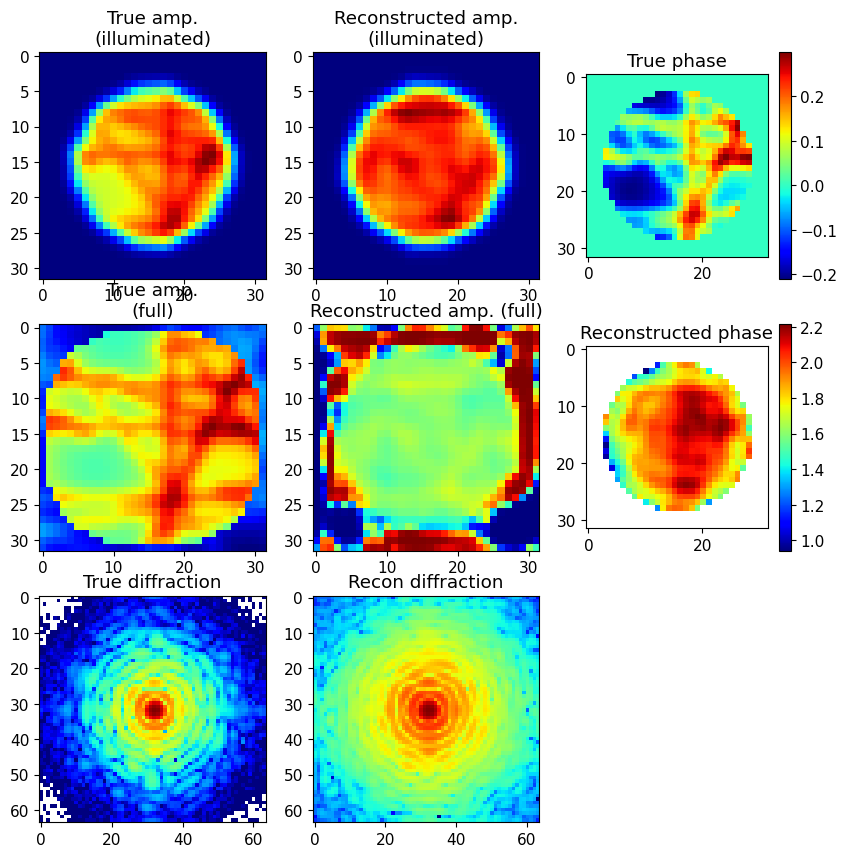

In [57]:
from ptycho import evaluation
pinn_heatmaps = [evaluation.summarize(i, train_pinn.pred_amp, train_pinn.reconstructed_obj, X_test, Y_I_test, Y_phi_test, probe.probe, 0) for i in idxs]
img_dict_pinn = pinn_heatmaps[0]

In [27]:
from ptycho import train_supervised


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

410/410 [==============================] - 8s 20ms/step - loss: 0.1538 - conv2d_12_loss: 0.0045 - conv2d_19_loss: 0.1492 - val_loss: 0.1545 - val_conv2d_12_loss: 0.0041 - val_conv2d_19_loss: 0.1503 - lr: 5.0000e-04
Epoch 8/60
410/410 [==============================] - 8s 20ms/step - loss: 0.1522 - conv2d_12_loss: 0.0045 - conv2d_19_loss: 0.1477 - val_loss: 0.1720 - val_conv2d_12_loss: 0.0040 - val_conv2d_19_loss: 0.1680 - lr: 5.0000e-04
Epoch 9/60
409/410 [============================>.] - ETA: 0s - loss: 0.1503 - conv2d_12_loss: 0.0043 - conv2d_19_loss: 0.1460
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
410/410 [==============================] - 8s 20ms/step - loss: 0.1503 - conv2d_12_loss: 0.0043 - conv2d_19_loss: 0.1460 - val_loss: 0.1604 - val_conv2d_12_loss: 0.0060 - val_conv2d_19_loss: 0.1544 - lr: 5.0000e-04
Epoch 10/60
410/410 [==============================] - 8s 20ms/step - loss: 0.1450 - conv2d_12_loss: 0.0038 - conv2d_19_loss: 0.1413 - val_lo

Epoch 41/60
410/410 [==============================] - 8s 20ms/step - loss: 0.0859 - conv2d_12_loss: 0.0026 - conv2d_19_loss: 0.0832 - val_loss: 0.1473 - val_conv2d_12_loss: 0.0029 - val_conv2d_19_loss: 0.1444 - lr: 1.0000e-04
Epoch 42/60
410/410 [==============================] - 8s 20ms/step - loss: 0.0852 - conv2d_12_loss: 0.0026 - conv2d_19_loss: 0.0825 - val_loss: 0.1459 - val_conv2d_12_loss: 0.0028 - val_conv2d_19_loss: 0.1431 - lr: 1.0000e-04
Epoch 43/60
410/410 [==============================] - 8s 20ms/step - loss: 0.0840 - conv2d_12_loss: 0.0026 - conv2d_19_loss: 0.0814 - val_loss: 0.1504 - val_conv2d_12_loss: 0.0027 - val_conv2d_19_loss: 0.1478 - lr: 1.0000e-04
Epoch 44/60
410/410 [==============================] - 8s 20ms/step - loss: 0.0840 - conv2d_12_loss: 0.0026 - conv2d_19_loss: 0.0814 - val_loss: 0.1494 - val_conv2d_12_loss: 0.0027 - val_conv2d_19_loss: 0.1467 - lr: 1.0000e-04
Epoch 45/60
410/410 [==============================] - 8s 20ms/step - loss: 0.0824 - conv2d_

In [30]:
from ptycho.generate_data import *
from ptycho.train import *

phase min: -0.60671055 phase max: 0.89149934


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:79: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934
phase min: -0.60671055 phase max: 0.89149934


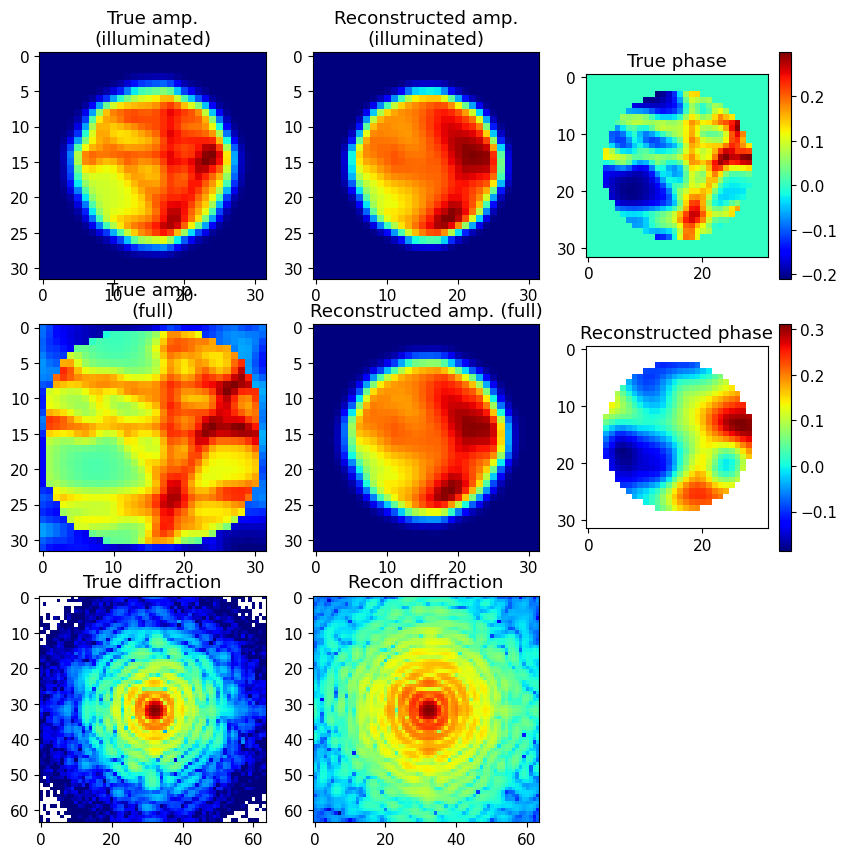

In [32]:
idxs = list(range(0, 100, 10))

from ptycho import evaluation
supervised_heatmaps = [evaluation.summarize(i, pred_amp, train_supervised.reconstructed_obj,
                                            X_test, Y_I_test, Y_phi_test, probe.probe, 0) for i in idxs]
img_dict_super = supervised_heatmaps[0]

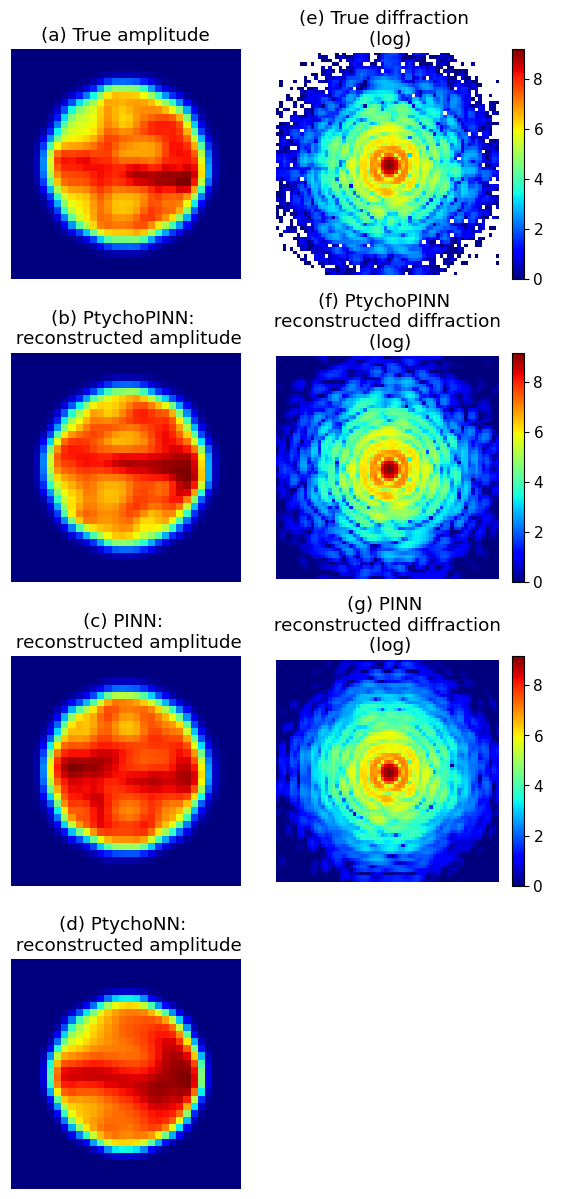

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(4, 2, figsize=(6, 12)) # Here we change the subplots to be 4x2 instead of 2x4

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_super = np.log(
    np.abs(np.exp(img_dict_super['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
# max_super = np.max(diff_super[np.isfinite(diff_super)]) if np.isinf(np.max(diff_super)) else np.max(diff_super)
vmax = np.maximum(max_ptychopinn, max_pinn)
# First column for amplitude
axs[0, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 0].set_title('(a) True amplitude')
axs[0, 0].axis('off')



axs[1, 0].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('(b) PtychoPINN: \n reconstructed amplitude')
axs[1, 0].axis('off')

axs[2, 0].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[2, 0].set_title('(c) PINN: \n reconstructed amplitude')
axs[2, 0].axis('off')

axs[3, 0].imshow(img_dict_super['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[3, 0].set_title('(d) PtychoNN: \n reconstructed amplitude')
axs[3, 0].axis('off')

# Second column for diffraction
im1 = axs[0, 1].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 1].set_title('(e) True diffraction \n (log)')
axs[0, 1].axis('off')
fig.colorbar(im1, ax=axs[0, 1])

im2 = axs[1, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet', vmin = 0)
#im2 = axs[1, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
#axs[1, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[1, 1].set_title('(f) PtychoPINN \n reconstructed diffraction \n (log)')
axs[1, 1].axis('off')
fig.colorbar(im2, ax=axs[1, 1])

#im3 = axs[2, 1].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
im3 = axs[2, 1].imshow(img_dict_pinn['rec_diffraction'], cmap='jet', vmin = 0)

#axs[2, 1].set_title('PINN: diffraction \n error (log absolute)')
axs[2, 1].set_title('(g) PINN \n reconstructed diffraction \n (log)')
axs[2, 1].axis('off')
fig.colorbar(im3, ax=axs[2, 1])

axs[3, 1].axis('off') # leaving the bottom right plot blank

plt.tight_layout()
plt.show()


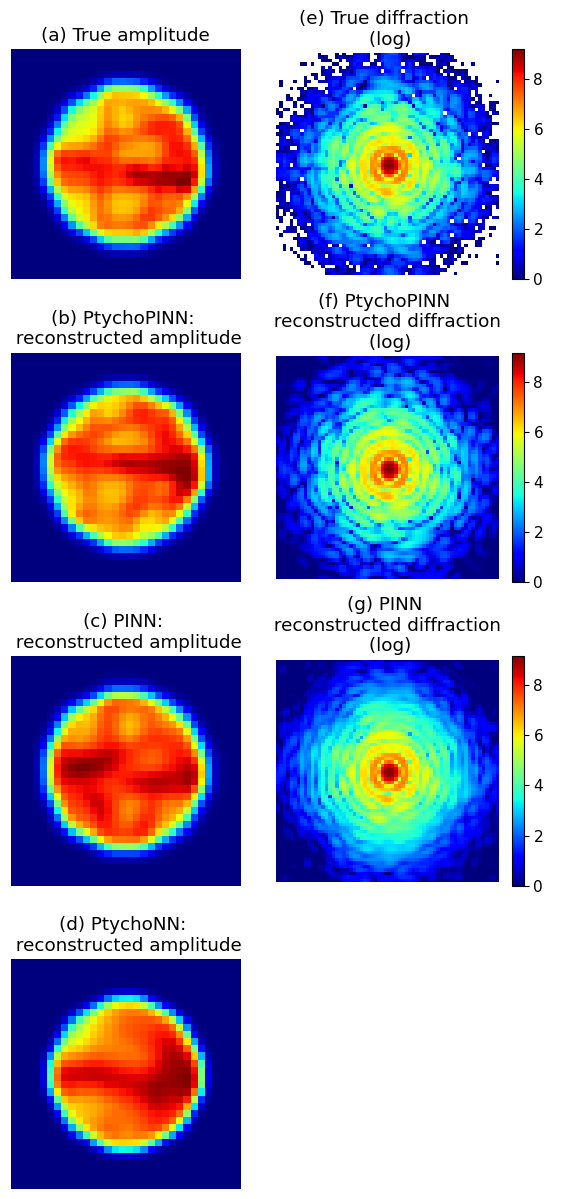

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(4, 2, figsize=(6, 12)) # Here we change the subplots to be 4x2 instead of 2x4

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_super = np.log(
    np.abs(np.exp(img_dict_super['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
# max_super = np.max(diff_super[np.isfinite(diff_super)]) if np.isinf(np.max(diff_super)) else np.max(diff_super)
vmax = np.maximum(max_ptychopinn, max_pinn)
# First column for amplitude
axs[0, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 0].set_title('(a) True amplitude')
axs[0, 0].axis('off')



axs[1, 0].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('(b) PtychoPINN: \n reconstructed amplitude')
axs[1, 0].axis('off')

axs[2, 0].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[2, 0].set_title('(c) PINN: \n reconstructed amplitude')
axs[2, 0].axis('off')

axs[3, 0].imshow(img_dict_super['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[3, 0].set_title('(d) PtychoNN: \n reconstructed amplitude')
axs[3, 0].axis('off')

# Second column for diffraction
im1 = axs[0, 1].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 1].set_title('(e) True diffraction \n (log)')
axs[0, 1].axis('off')
fig.colorbar(im1, ax=axs[0, 1])

im2 = axs[1, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet', vmin = 0)
#im2 = axs[1, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
#axs[1, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[1, 1].set_title('(f) PtychoPINN \n reconstructed diffraction \n (log)')
axs[1, 1].axis('off')
fig.colorbar(im2, ax=axs[1, 1])

#im3 = axs[2, 1].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
im3 = axs[2, 1].imshow(img_dict_pinn['rec_diffraction'], cmap='jet', vmin = 0)

#axs[2, 1].set_title('PINN: diffraction \n error (log absolute)')
axs[2, 1].set_title('(g) PINN \n reconstructed diffraction \n (log)')
axs[2, 1].axis('off')
fig.colorbar(im3, ax=axs[2, 1])

axs[3, 1].axis('off') # leaving the bottom right plot blank

plt.tight_layout()
plt.show()


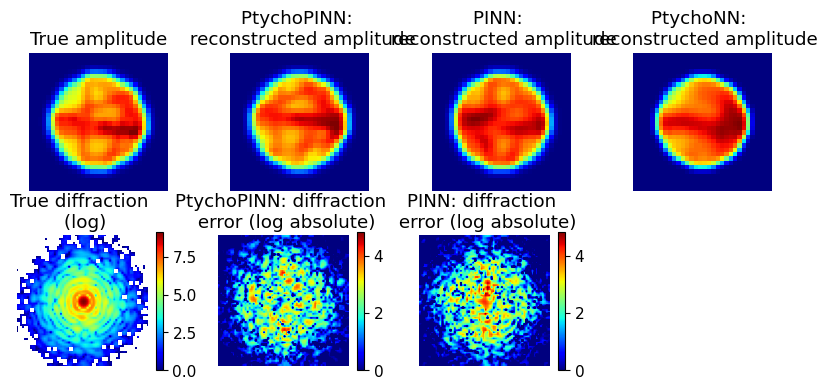

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_super = np.log(
    np.abs(np.exp(img_dict_super['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
# max_super = np.max(diff_super[np.isfinite(diff_super)]) if np.isinf(np.max(diff_super)) else np.max(diff_super)
vmax = np.maximum(max_ptychopinn, max_pinn)

# bottom row for diffraction
im1 = axs[1, 0].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[1, 0].set_title('True diffraction \n (log)')
axs[1, 0].axis('off')
fig.colorbar(im1, ax=axs[1, 0])

im2 = axs[1, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[1, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[1, 1].axis('off')
fig.colorbar(im2, ax=axs[1, 1])

im3 = axs[1, 2].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[1, 2].set_title('PINN: diffraction \n error (log absolute)')
axs[1, 2].axis('off')
fig.colorbar(im3, ax=axs[1, 2])

# top row for amplitude
axs[0, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 0].set_title('True amplitude')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed amplitude')
axs[0, 2].axis('off')

axs[0, 3].imshow(img_dict_super['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[0, 3].set_title('PtychoNN: \n reconstructed amplitude')
axs[0, 3].axis('off')

axs[1, 3].axis('off')

plt.tight_layout()
plt.show()


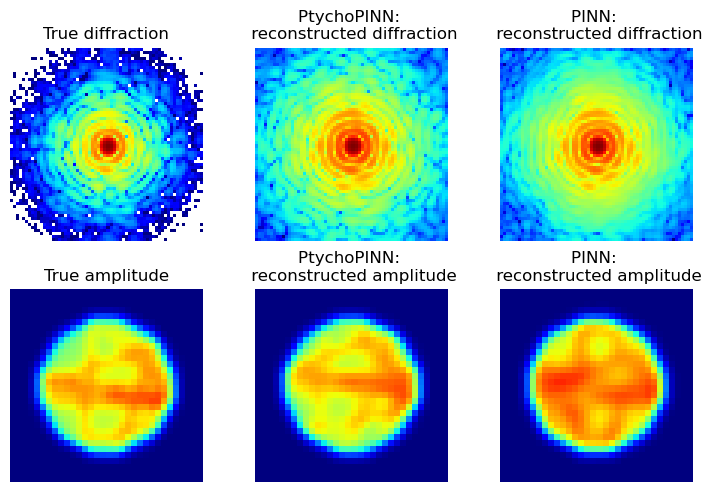

In [25]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Top row for diffraction
axs[0, 0].imshow(img_dict_ptychopinn['true_diffraction'], cmap='jet')
axs[0, 0].set_title('True diffraction')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed diffraction')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_diffraction'], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed diffraction')
axs[0, 2].axis('off')

vmin, vmax = 0, .75
gtscale = 1.3
# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32] / gtscale, cmap='jet',
                vmin = vmin, vmax = vmax)
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet',
                vmin = vmin, vmax = vmax)
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet',
                vmin = vmin, vmax = vmax)
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


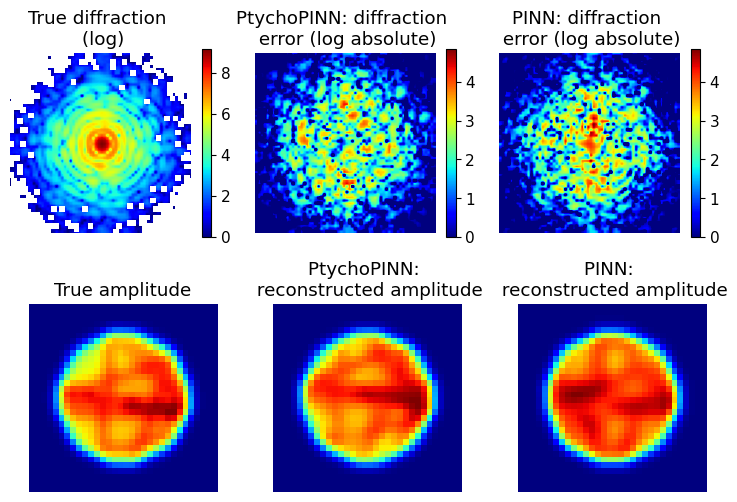

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
vmax = np.maximum(max_ptychopinn, max_pinn)

# Top row for diffraction
im1 = axs[0, 0].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 0].set_title('True diffraction \n (log)')
axs[0, 0].axis('off')
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[0, 1].axis('off')
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[0, 2].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('PINN: diffraction \n error (log absolute)')
axs[0, 2].axis('off')
fig.colorbar(im3, ax=axs[0, 2])

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


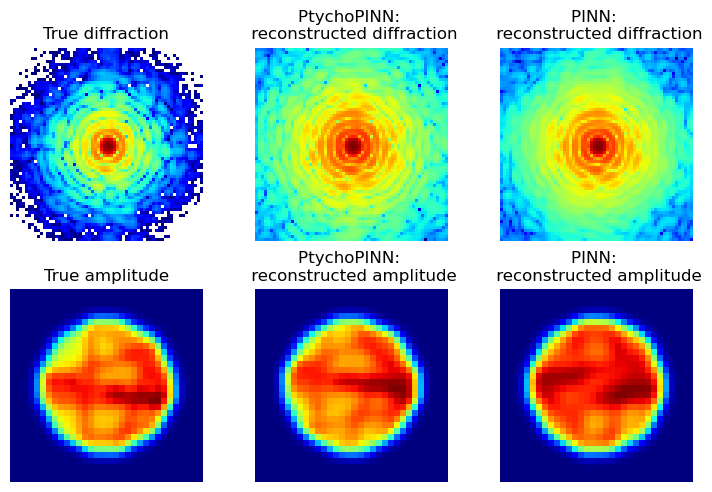

In [81]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Top row for diffraction
axs[0, 0].imshow(img_dict_ptychopinn['true_diffraction'], cmap='jet')
axs[0, 0].set_title('True diffraction')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed diffraction')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_diffraction'], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed diffraction')
axs[0, 2].axis('off')

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [273]:
plt.rcParams["figure.figsize"] = (5, 5)

(0.070346646, 0.14565049)

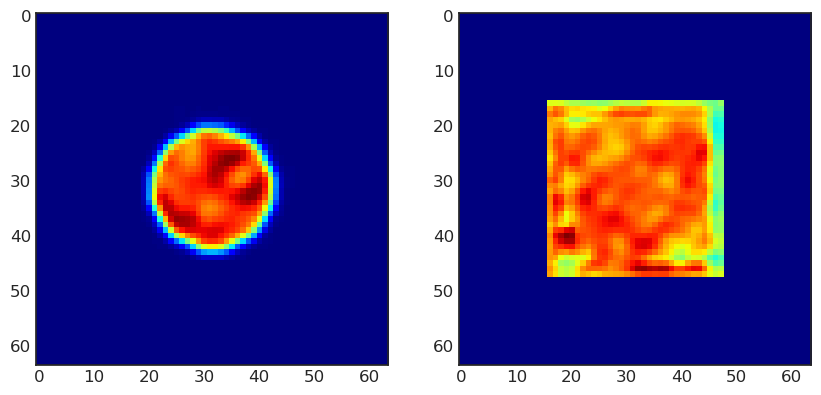

In [53]:
# plt.subplots(1, 2, 2)
plt.subplot(1, 2, 1)
plt.imshow(baseline_pred_I[100, :, :, 0], cmap = 'jet')
plt.subplot(1, 2, 2)
plt.imshow(np.absolute(b[100, :, :, 0]), cmap = 'jet')
baseline_pred_I[100, :, :, 0].mean(), np.mean(np.absolute(b[100, :, :, 0]))

In [183]:
from ptycho import physics
baseline_pred_diff_amplitude = hh.pad_and_diffract(baseline_pred_I, 64, 64, False)[0]